In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [33]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')
submit = pd.read_csv('../csv/sample_submission.csv')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [22]:
drop_train = train.loc[:, "Gender":"MTRANS"]
drop_test = test.loc[:, "Gender":"MTRANS"]
together = pd.concat([drop_train, drop_test])
together.shape

(34598, 16)

In [23]:
categorical = together.select_dtypes(include=["object"]).columns
numerical = together.select_dtypes(include=["int64", "float64"]).columns

In [32]:
for i, col in enumerate(categorical):
    print(together[col])

0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
13835      Male
13836    Female
13837    Female
13838      Male
13839      Male
Name: Gender, Length: 34598, dtype: object
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
13835    yes
13836     no
13837     no
13838    yes
13839    yes
Name: family_history_with_overweight, Length: 34598, dtype: object
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
13835     no
13836    yes
13837    yes
13838    yes
13839    yes
Name: FAVC, Length: 34598, dtype: object
0         Sometimes
1        Frequently
2         Sometimes
3         Sometimes
4         Sometimes
            ...    
13835     Sometimes
13836     Sometimes
13837    Frequently
13838     Sometimes
13839     Sometimes
Name: CAEC, Length: 34598, dtype: object
0        no
1        no
2        no
3        no
4        no
         ..
13835    no
13836    no
13837    no
13838    no
13839 

In [ ]:
plt.figure(figsize=(10, 6))
together[col].value_counts().plot.bar()
plt.title(col)
plt.ylabel(col)
plt.show()

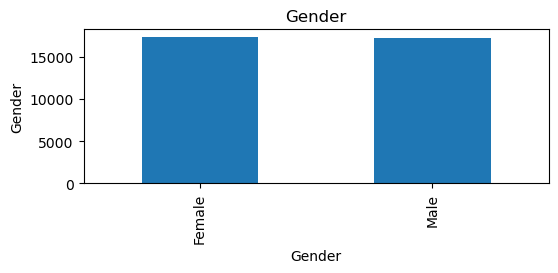

In [30]:
plt.figure(figsize=(6, 2))
together['Gender'].value_counts().plot.bar()
plt.title('Gender')
plt.ylabel('Gender')
plt.show()

<Axes: xlabel='NObeyesdad', ylabel='count'>

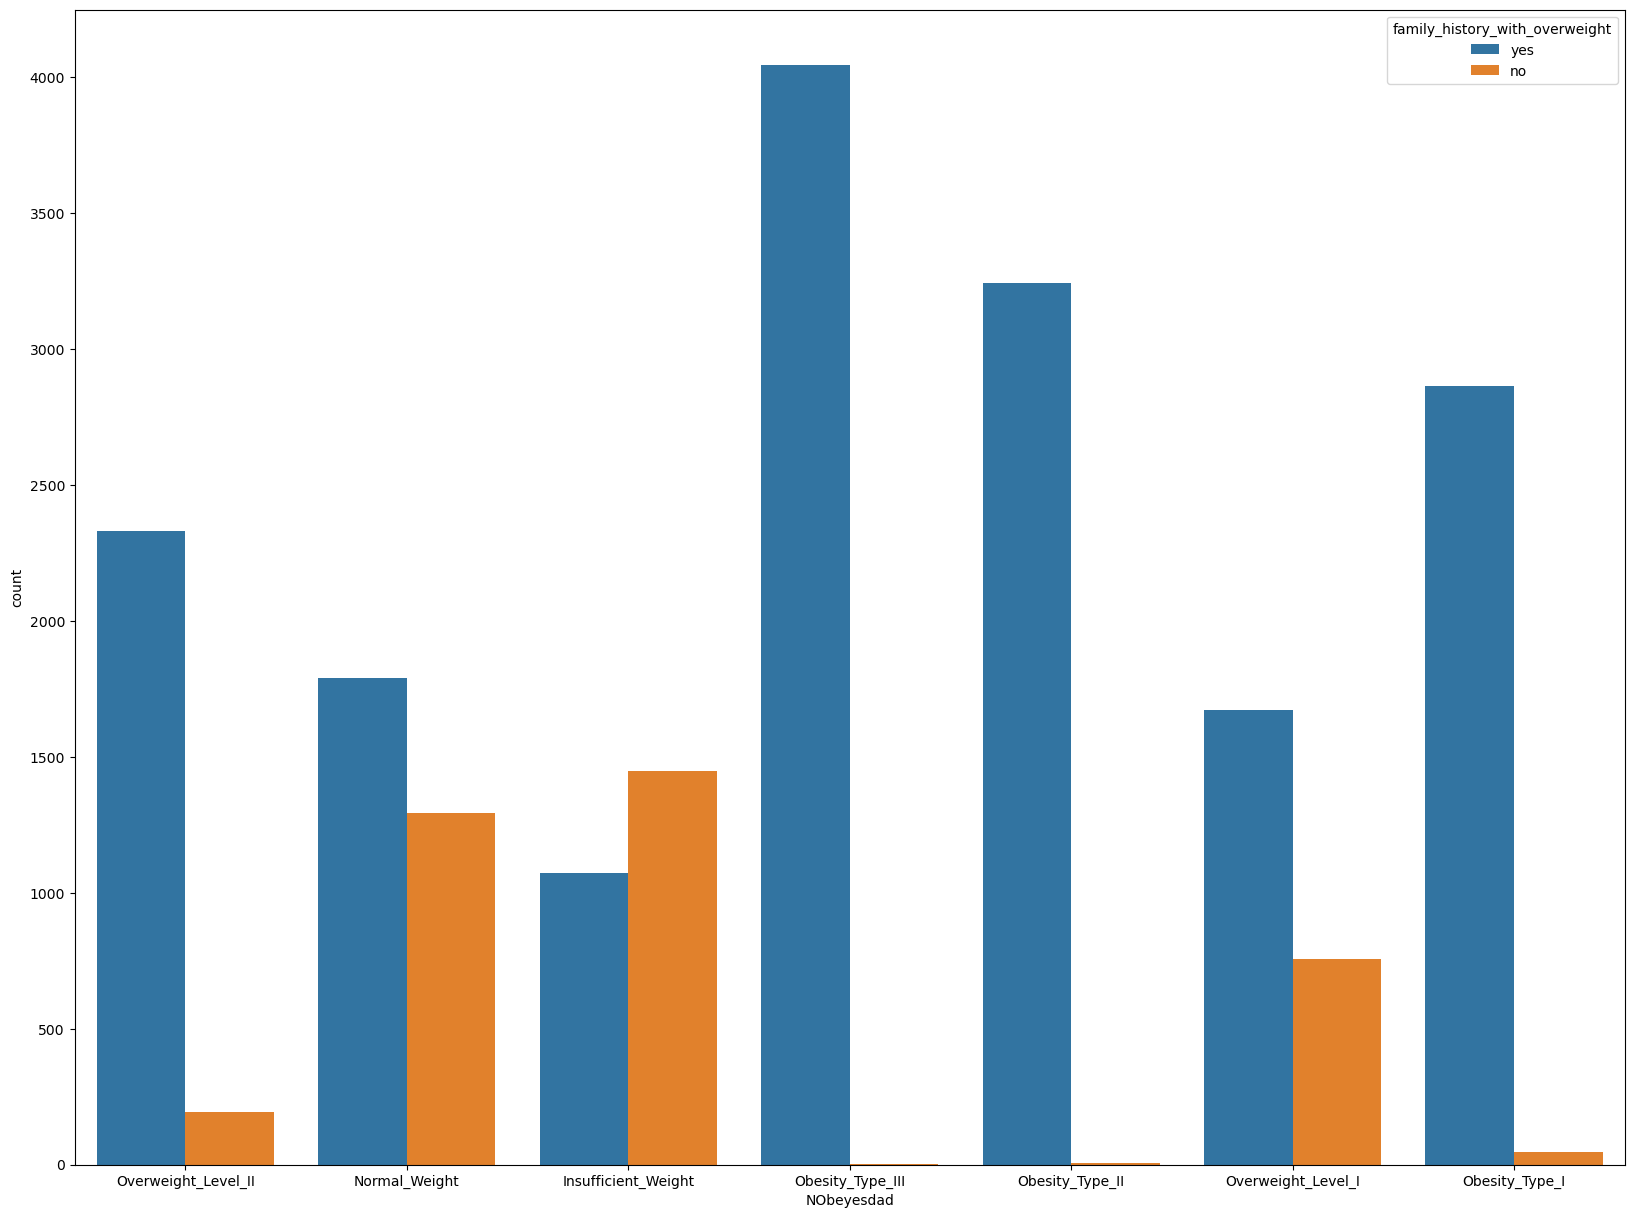

In [34]:
plt.figure(figsize=(20,15))
sns.countplot(data = train, x='NObeyesdad', hue='family_history_with_overweight')

In [55]:
from sklearn.preprocessing import LabelEncoder

def encode_features(data):
    features = data.select_dtypes(include=['object']).columns
    
    for feature in features:
        encoder = LabelEncoder()
        feature_data = encoder.fit(data[feature].astype(str))
        data[feature] = encoder.transform(feature_data.astype(str))
        
    return data

In [56]:
df_train = encode_features(train)
df_test = encode_features(test)

In [13]:
label = df_train['NObeyesdad']
df_train.drop(columns =['NObeyesdad', 'id'], inplace = True)
df_test.drop(columns='id', inplace = True)

In [25]:
from sklearn.preprocessing import MinMaxScaler

def scaler_features(data):
    features = data.select_dtypes(include=["int64", "float64"]).columns
    for feature in features:
        scaler = MinMaxScaler()
        feature_data = data[feature].values.reshape(-1, 1)
        scaler.fit(feature_data)
        data[feature] = scaler.transform(feature_data)
    
    return data

In [26]:
df_train = scaler_features(df_train)
df_test = scaler_features(df_test)

In [29]:
df_train['MTRANS'].describe()

count    20758.000000
mean         2.506841
std          1.148730
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: MTRANS, dtype: float64